In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import string # special operations on strings
import spacy # language models
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
elon = pd.read_csv("Elon_musk.csv", encoding = 'latin1')
elon

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [3]:
elon.shape

(1999, 2)

In [4]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
# remove both the leading and the trailing characters
elon = [y.strip() for y in elon['Text']]
elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
len(elon)

1999

In [7]:
# removes empty strings, because they are considered in Python as False
elon = [Text for Text in elon if Text] 
elon

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [8]:
len(elon)

1999

In [9]:
# Joining the list into one string/text
text = ' '.join(elon)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
# Punctuation

no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/tech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [14]:
len(text_tokens)

21078

In [15]:
text_tokens[0:50]

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo']

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/tech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#Remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# Simplified look of the no_stop_tokens for loop
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [19]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [20]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [21]:
import en_core_web_sm

In [22]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
nlp

In [23]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [24]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


### Feature Extraction

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [26]:
X

<15562x4978 sparse matrix of type '<class 'numpy.int64'>'
	with 15338 stored elements in Compressed Sparse Row format>

In [27]:
vectorizer.vocabulary_

{'kunalb11': 2710,
 'alien': 231,
 'idaacarmack': 2446,
 'ray': 3632,
 'trace': 4506,
 'cyberpunk': 966,
 'hdr': 1681,
 'nextlevel': 3169,
 'have': 1675,
 'try': 4541,
 'joerogan': 2629,
 'spotify': 4125,
 'great': 1614,
 'interview': 2557,
 'gtera27': 1633,
 'doge': 1119,
 'underestimate': 4672,
 'teslacn': 4351,
 'congratulations': 860,
 'tesla': 4345,
 'china': 743,
 'amazing': 257,
 'execution': 1329,
 'last': 2730,
 'year': 4945,
 'now': 3208,
 'next': 3168,
 'even': 1301,
 'happy': 1662,
 'new': 3165,
 'ox': 3326,
 'httpstco9wfkmyu2oj': 1872,
 'frodo': 1499,
 'underdoge': 4671,
 'all': 234,
 'thought': 4431,
 'would': 4922,
 'fail': 1365,
 'himself': 1727,
 'httpstcozgxjfdzzrm': 2405,
 'owensparks': 3323,
 'flcnhvy': 1441,
 'anonyx10': 286,
 'haha': 1648,
 'thank': 4389,
 'indeed': 2496,
 'tweets': 4563,
 'definitely': 1021,
 'represent': 3717,
 'realworld': 3657,
 'time': 4450,
 'allocation': 236,
 'the': 4397,
 'entertaining': 1257,
 'outcome': 3303,
 'likely': 2793,
 'givedire

In [28]:
vectorizer.vocabulary_.keys()

dict_keys(['kunalb11', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thank', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'agree', 'clubhouse', 'kanyew', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it', 'get', 'real', 'bought', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'he', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'fix', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'this', 'true', 'power', 'httpstcof

In [29]:
vectorizer.vocabulary_.values()

dict_values([2710, 231, 2446, 3632, 4506, 966, 1681, 3169, 1675, 4541, 2629, 4125, 1614, 2557, 1633, 1119, 4672, 4351, 860, 4345, 743, 257, 1329, 2730, 4945, 3208, 3168, 1301, 1662, 3165, 3326, 1872, 1499, 4671, 234, 4431, 4922, 1365, 1727, 2405, 3323, 1441, 286, 1648, 4389, 2496, 4563, 1021, 3717, 3657, 4450, 236, 4397, 1257, 3303, 2793, 1584, 2657, 3900, 200, 785, 2666, 1810, 1564, 4701, 2579, 1569, 3646, 581, 1121, 2794, 4472, 1737, 2642, 1682, 2577, 3904, 3892, 529, 1717, 1489, 1433, 3443, 4699, 151, 365, 4634, 4426, 4534, 3485, 1977, 295, 944, 4808, 4905, 1583, 3524, 2684, 423, 902, 4956, 308, 4228, 3806, 4089, 3127, 3893, 1370, 1692, 2739, 1429, 4568, 1217, 2874, 1547, 4473, 3263, 3040, 1808, 214, 541, 3629, 172, 3262, 3498, 683, 1447, 3661, 4845, 4149, 2567, 4139, 1076, 4321, 263, 1189, 1240, 1764, 1874, 3149, 3362, 1017, 734, 3151, 1850, 2858, 3390, 4482, 669, 3911, 3156, 4739, 3539, 2899, 3115, 3855, 2362, 2965, 3513, 912, 3267, 1073, 4310, 3942, 4469, 2539, 1178, 2958, 2447, 

In [30]:
vectorizer.vocabulary_.items()

dict_items([('kunalb11', 2710), ('alien', 231), ('idaacarmack', 2446), ('ray', 3632), ('trace', 4506), ('cyberpunk', 966), ('hdr', 1681), ('nextlevel', 3169), ('have', 1675), ('try', 4541), ('joerogan', 2629), ('spotify', 4125), ('great', 1614), ('interview', 2557), ('gtera27', 1633), ('doge', 1119), ('underestimate', 4672), ('teslacn', 4351), ('congratulations', 860), ('tesla', 4345), ('china', 743), ('amazing', 257), ('execution', 1329), ('last', 2730), ('year', 4945), ('now', 3208), ('next', 3168), ('even', 1301), ('happy', 1662), ('new', 3165), ('ox', 3326), ('httpstco9wfkmyu2oj', 1872), ('frodo', 1499), ('underdoge', 4671), ('all', 234), ('thought', 4431), ('would', 4922), ('fail', 1365), ('himself', 1727), ('httpstcozgxjfdzzrm', 2405), ('owensparks', 3323), ('flcnhvy', 1441), ('anonyx10', 286), ('haha', 1648), ('thank', 4389), ('indeed', 2496), ('tweets', 4563), ('definitely', 1021), ('represent', 3717), ('realworld', 3657), ('time', 4450), ('allocation', 236), ('the', 4397), ('e

In [31]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

kunalb11  alien  idaacarmack   ray  trace  cyberpunk   hdr  nextlevel  \
0      2710    231         2446  3632   4506        966  1681       3169   

   have   try  ...  dire  priority  surreal  propaganda  social  \
0  1675  4541  ...  1083      3521     4261        3557    4045   

   httpstcowjrzibkh1h  click  samwise  gamgee  altho  
0                2337    777     3834    1535    247  

[1 rows x 4978 columns]

In [32]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

0
kunalb11            2710
alien                231
idaacarmack         2446
ray                 3632
trace               4506
...                  ...
httpstcowjrzibkh1h  2337
click                777
samwise             3834
gamgee              1535
altho                247

[4978 rows x 1 columns]

In [33]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0, ascending = True)

0
005                 0
10                  1
100                 2
1000                3
10000               4
...               ...
zshauladventure  4973
zubinanary       4974
zwiebelbach      4975
zzcool           4976
ðogecoin         4977

[4978 rows x 1 columns]

In [34]:
print(vectorizer.get_feature_names()[50:100])

['23', '230', '24', '240am', '247teslanew', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']


/Users/tech/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
arr = X.toarray()
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
arr.shape

(15562, 4978)

In [37]:
print(arr[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Let's see how bigrams and trigrams can be included here

In [38]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,3),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(elon)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [39]:
print(vectorizer_ngram_range.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [40]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TFidf Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm = 'l2',
                                               analyzer = 'word',
                                               ngram_range = (1,3),
                                               max_features = 10)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(elon)
tf_idf_matrix_n_gram_max_features

<1999x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3914 stored elements in Compressed Sparse Row format>

In [42]:
print(vectorizer_n_gram_max_features.get_feature_names())

['amp', 'co', 'https', 'https co', 'in', 'is', 'of', 'spacex', 'the', 'to']


In [43]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
pd.DataFrame(tf_idf_matrix_n_gram_max_features.toarray(),
            columns = vectorizer_n_gram_max_features.get_feature_names())

amp        co     https  https co        in        is   of  spacex  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
1     0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.0     0.0   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
3     0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.0     0.0   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
...        ...       ...       ...       ...       ...       ...  ...     ...   
1994  0.434383  0.281219  0.281219  0.281629  0.429888  0.372051  0.0     0.0   
1995  0.768324  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
1996  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   
1997  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.0     0.0   
1998  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0     0.0   

           the        to  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.690990  0.722865  
...        ...       ...  
1994  0.345911  0.361868  
1995  0.000000  0.640061  
1996  0.000000  0.000000  
1997  0.000000  0.000000  
1998  0.000000  0.000000  

[1999 rows x 10 columns]

### Generate WordCloud

In [45]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

In [46]:
stopwords = STOPWORDS
stopwords.add('will')

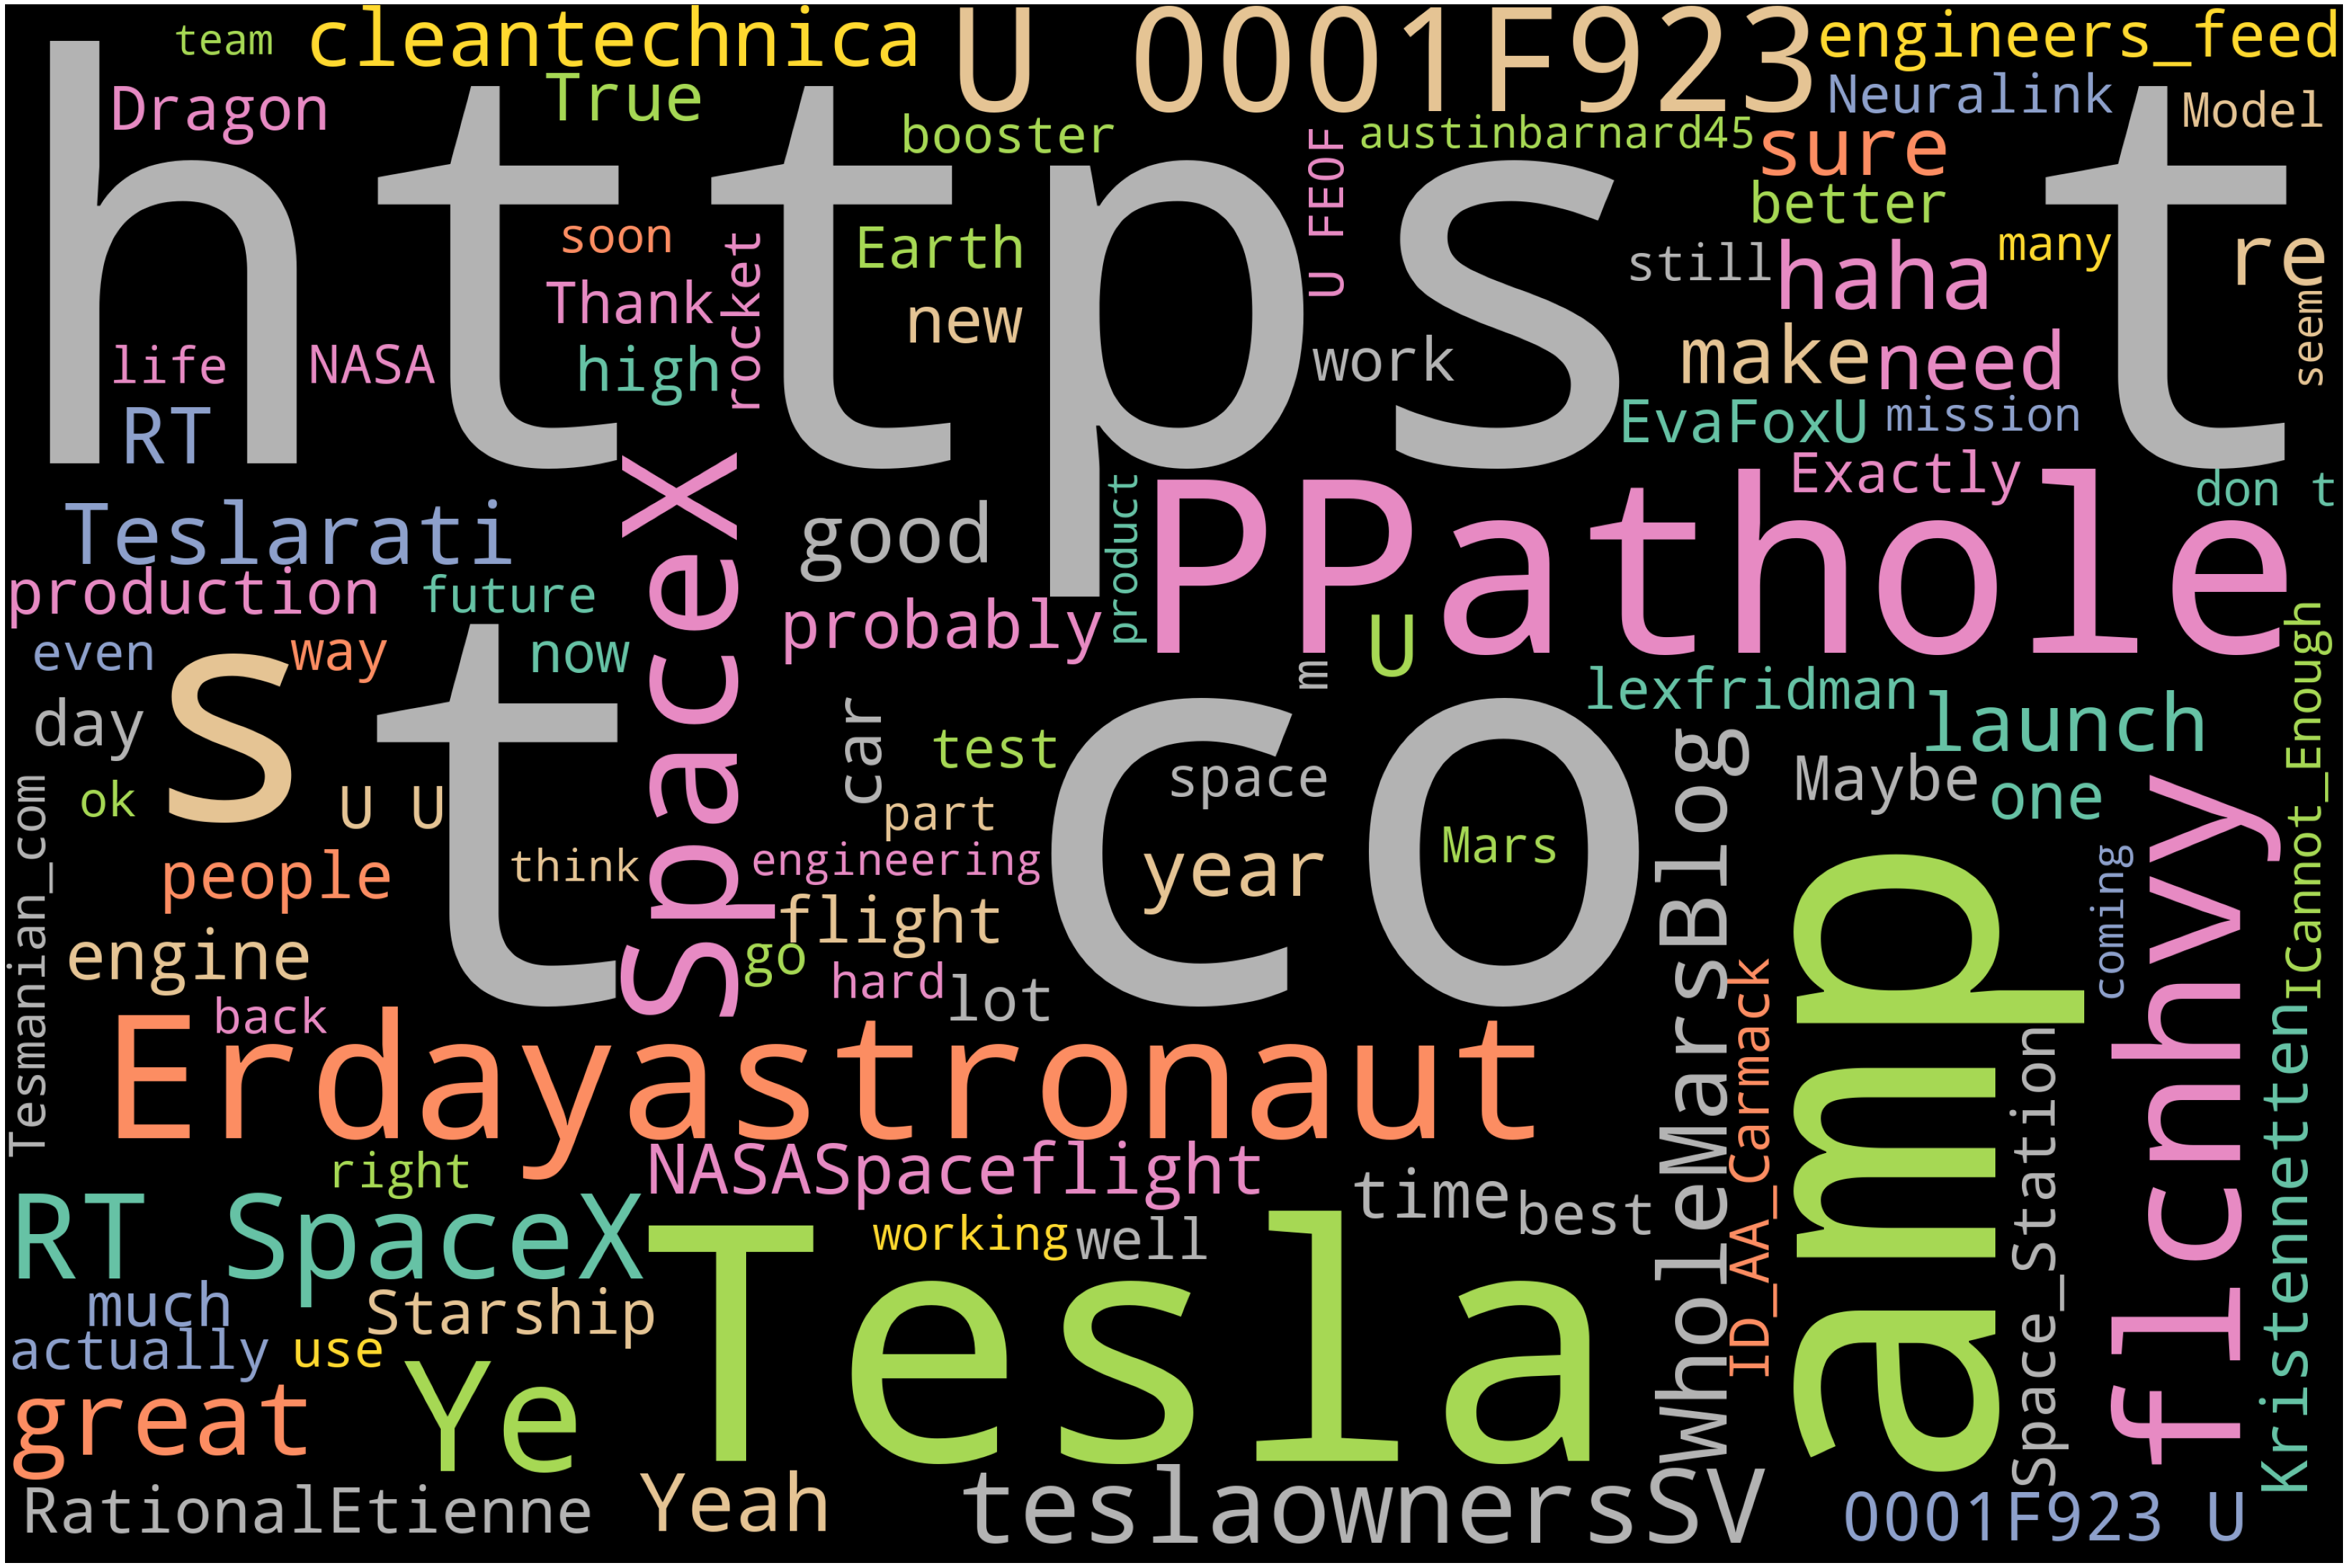

In [47]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color='black',
                      max_words=100,
                      colormap='Set2',
                      stopwords=stopwords).generate(text)
# Plot    
plot_cloud(wordcloud)

In [48]:
# Save image
wordcloud.to_file("wordcloud.png")

In [49]:
from nltk import tokenize

In [50]:
sentences=tokenize.sent_tokenize(' '.join(elon))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [51]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

### Named Entity Recognition

In [52]:
# Parts Of Speech (POS) Tagging
nlp = spacy.load('en_core_web_sm')

one_block=text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [53]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

most ADV
entertaining ADJ
outcome NOUN
is AUX
the DET
most ADV
likely ADJ
@GiveDirectly ADV
Just ADV
sent VERB
some PRON
Just ADV
agree VERB
to PART
do VERB
Clubhouse PROPN
with ADP
@kanyewest PROPN
https://t.co/3rWE9uHSTS PUNCT
@geoffkeighley PROPN
@UnrealEngine PROPN
Its PROPN
getting VERB
real ADV
Bought VERB
some DET
Dogecoin PROPN
for ADP
lil ADJ
X NOUN
, PUNCT
so SCONJ
he PRON
can AUX
be AUX
a DET
toddler NOUN
hodler NOUN
@JoshManMode PROPN
He PRON
definitely ADV
has VERB
issues NOUN
, PUNCT
but CCONJ
the DET
sentencing NOUN
seems VERB
a DET
bit NOUN
high ADJ
@freewalletorg PROPN
Thanks NOUN
for ADP
fixing VERB
@freewalletorg PROPN
Please INTJ
unlock VERB
my PRON
account NOUN
@AstroJordy PROPN
< X
U+0001F923><U+0001F923 X
> X
This PRON
is AUX
true ADJ
power NOUN
haha INTJ
https://t.co/Fc9uhQSd7O NOUN
@freewalletorg PROPN
Any DET
crypto ADJ
wallet NOUN
that PRON
wont NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [54]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['@CapybaraSurfer', '@MattWallace888', 'seem', 'bit', '@itsALLrisky', 'appears', 'fixed', '#', 'coins', 'unit', 'time', 'launch', 'tower', 'stack', 'orbit', 'booster', 'Improve', 'ship', 'booster', 'mass', '_', 'work', 'tonight', 'video', 'https://t.co/UEEocOfcTb', 'people', 'spoken', 'image', 'doesn\x92t', 'reflect', 'time', 'cost', 'people', 'rain', 'let', 'Hodl', 'rainforests', 'come', '@itsALLrisky', 'crypto', 'simplicity', 'genius', '@AstroJordy', 'decades', 'work', 'Have', 'look', 'notes', 'emails', 'texts', 'learned', 'tell', 'story', 'SpaceX', '@TheOnion', 'read', 'heard', 'name', 'years', 'https://t.co/cnOf9yjpF1', '@OwenSparks', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'currency', 'scratch', '@SpaceX', 'said', 'ship', 'landing', 'burn', 'has', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'thrusters', '@Erdayastronaut', 'seem', 'turbopump', 'fed', 'Raptors', 'have', '@NASASpaceflight', 'launch', 'mission', 'collect', 'data', 'galaxies', 'explore', 'launches', 

In [55]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']

In [56]:
# viewing top ten results
wd_df[0:10]

word  count
0          https    125
1             co    125
2           have     49
3         launch     43
4  wholemarsblog     41
5         spacex     37
6           make     32
7         people     31
8           need     31
9           year     30

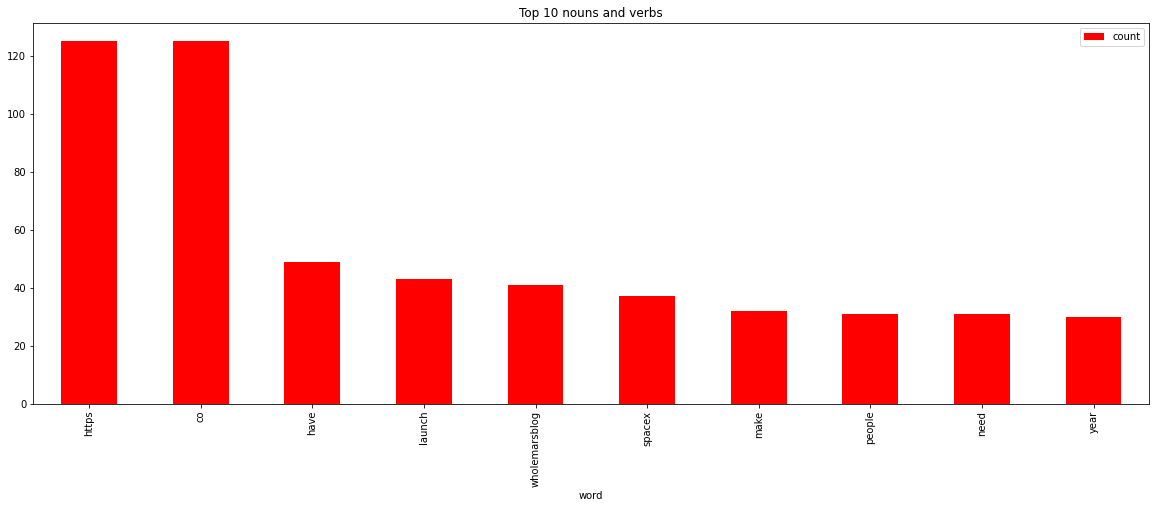

In [57]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');

### Emotion Mining Analysis

In [58]:
from nltk import tokenize

In [59]:
sentences=tokenize.sent_tokenize(' '.join(elon))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [60]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [61]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [62]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [63]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [64]:
# manual testing
calculate_sentiment(text='great')

3

In [65]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [66]:
# how many words are there in a sentence
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [67]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
837  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
920  It may never pay out, as the stock cant b
 ht...               -4   
611  Then static fire, checkouts, static fire, fly ...               -4   
..                                                 ...              ...   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               15   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
837          61  
647          60  
64           11  
920          31  
611          12  
..          ...  
645          65  
585         138  
36          231  
105          94  
719          72  

[924 rows x 3 columns]

In [68]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[497 rows x 3 columns]

In [69]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
911                       He was one of the very best.                3   
913  @Ali_Afshari In general, we need to improve ho...                4   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                7   
917               This is both great &amp; terrifying.                3   
918  Everything weve ever sensed or thought has be...                3   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
911           7  
913          87  
915          15  
917           6  
918          17  

[427 rows x 3 columns]

In [70]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

/Users/tech/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

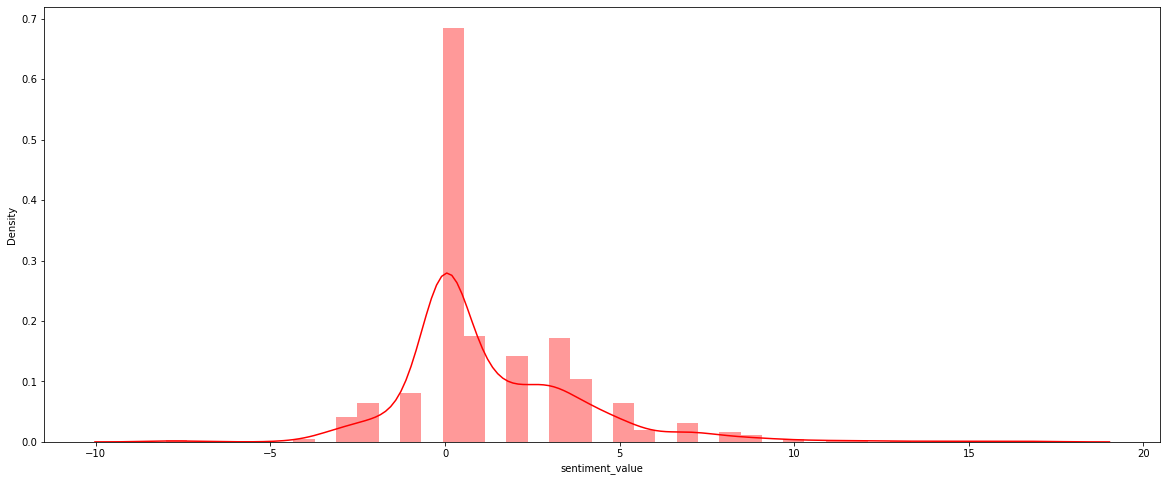

In [71]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(20,8))
sns.distplot(sent_df['sentiment_value'],color='red')

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

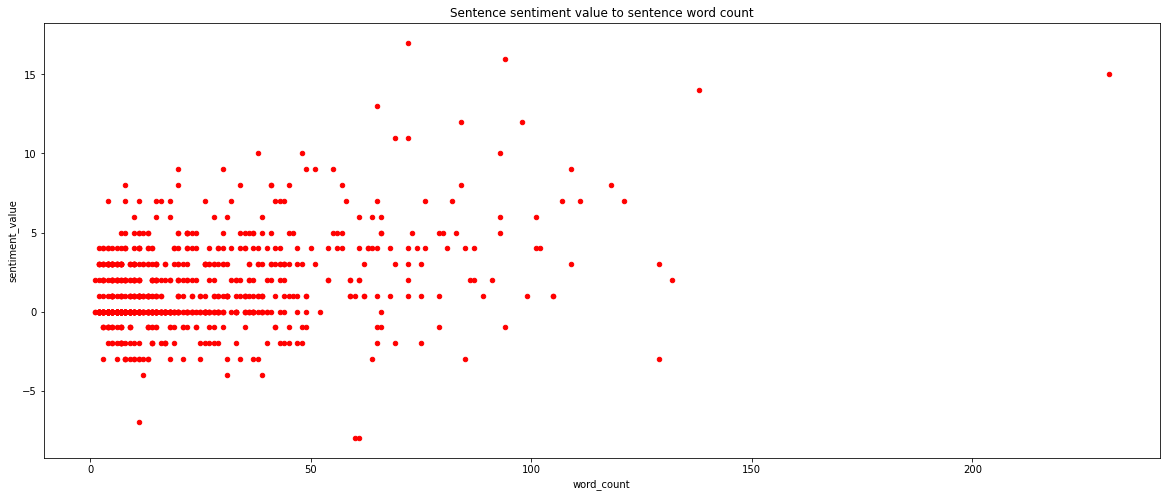

In [72]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',title='Sentence sentiment value to sentence word count',figsize=(20,8),color='red')

<AxesSubplot:ylabel='Density'>

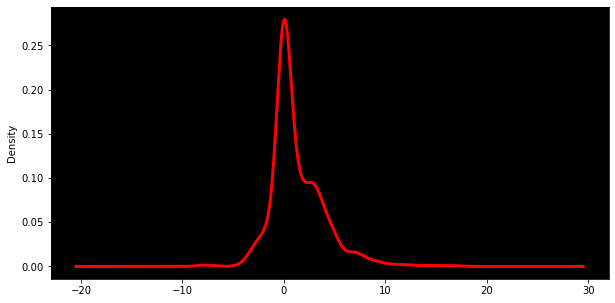

In [73]:
# density plot
ax=plt.axes()
ax.set_facecolor("black")
sent_df['sentiment_value'].plot(kind='kde',figsize=(10,5),color='red',linewidth=3)

<AxesSubplot:ylabel='Density'>

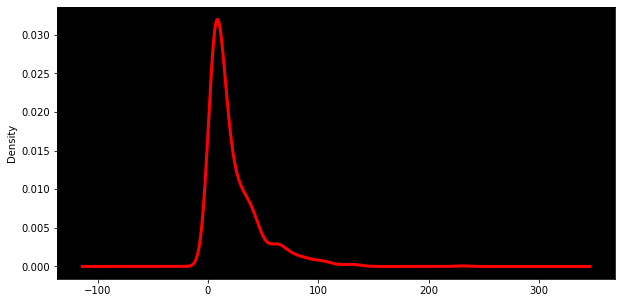

In [74]:
# density plot
ax=plt.axes()
ax.set_facecolor("black")
sent_df['word_count'].plot(kind='kde',figsize=(10,5),color='red',linewidth=3)

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

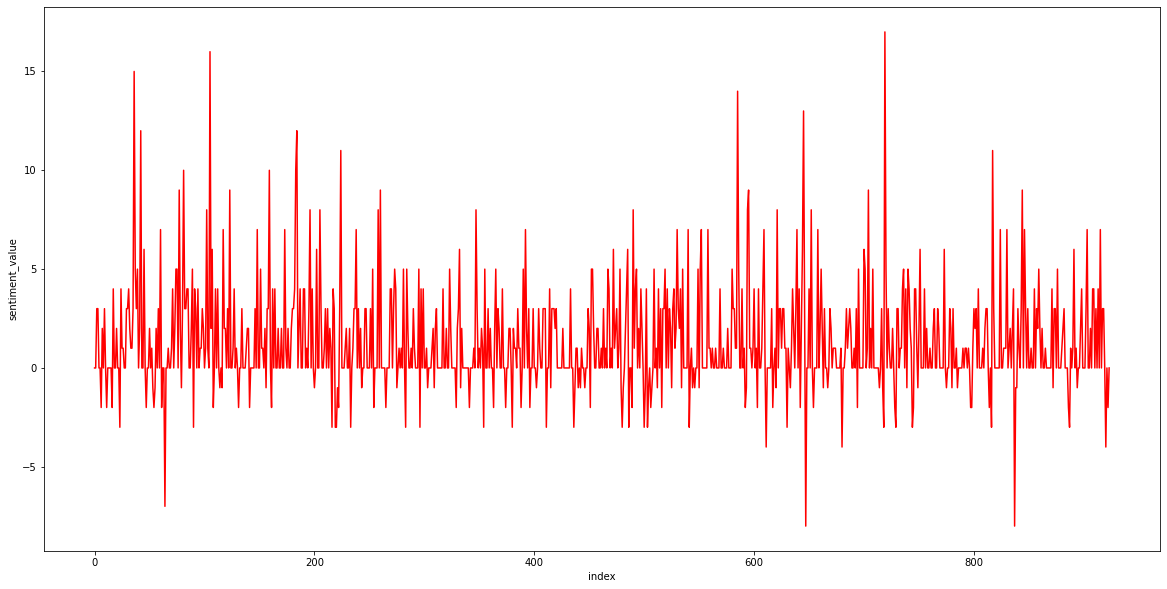

In [75]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(20,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df,color='red')

In [76]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_value'],bins=[-8, -1, 0, 17], 
                                    labels=['Negative','Neutral','Positive'], right = True)

<AxesSubplot:xlabel='Sentiment_Class', ylabel='count'>

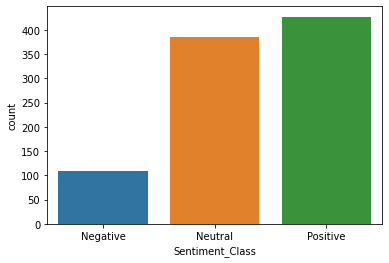

In [77]:
sns.countplot(x = 'Sentiment_Class', data = sent_df)

In [78]:
sent_df['Sentiment_Class'].value_counts()

Positive    427
Neutral     386
Negative    109
Name: Sentiment_Class, dtype: int64

## Q.2 
### E-commerce review 

In [79]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import requests
import string

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup as bs

In [80]:
samsung_reviews = []

In [81]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

In [82]:
samsung_reviews

["\nS20 Ultra is 6.9 inches of pure smoothness and brilliance. I am coming from One Plus 7pro and was looking to upgrade. 8 Pro sounds like a logical choice, but after having used A70 for sometime, wanted to use the great displays Samsung is famous for.Most people buy phones for various reasons. For me there are following things I look for:1. Display quality2. Ease of use3. Safety and security4. Clean interface with possible customisations5. Of course, the basic ability to make and receive audio/video calls with stability.6. Battery lifeS20 Ultra fulfils most above criterion, except maybe the fingerprint reader. I have used OP 7Pro, Oppo, Realme and Mi. Believe me, fingerprint reader implementation by Samsung is the worst.  It will leave you fuming when you need to unlock phone in a hurry. Face recognition is fast, but with 'mask on' situation, face reader is of no use.That for me is the single bad point for all Samsung phones.Before picking up S20 Ultra, I tried Note 20 Ultra and abso

In [83]:
reviews = ' '.join(samsung_reviews)

### Data Cleaning

In [84]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

### Tokenize

In [85]:
reviews_token = word_tokenize(reviews)
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [86]:
reviews_without_sw

['ultra',
 'inches',
 'pure',
 'smoothness',
 'brilliance',
 'coming',
 'pro',
 'upgrade',
 'pro',
 'sounds',
 'logical',
 'choice',
 'wanted',
 'great',
 'displays',
 'samsung',
 'famous',
 'buy',
 'phones',
 'reasons',
 'things',
 'display',
 'quality',
 'ease',
 'safety',
 'security',
 'clean',
 'interface',
 'possible',
 'customisations',
 'course',
 'basic',
 'ability',
 'make',
 'receive',
 'audio',
 'video',
 'calls',
 'stability',
 'battery',
 'lifes',
 'ultra',
 'fulfils',
 'criterion',
 'fingerprint',
 'reader',
 'pro',
 'oppo',
 'realme',
 'believe',
 'fingerprint',
 'reader',
 'implementation',
 'samsung',
 'worst',
 'leave',
 'fuming',
 'unlock',
 'phone',
 'hurry',
 'recognition',
 'fast',
 'mask',
 'situation',
 'reader',
 'single',
 'point',
 'samsung',
 'phones',
 'picking',
 'ultra',
 'note',
 'ultra',
 'absolutely',
 'phone',
 'heating',
 'seconds',
 'wise',
 'note',
 'ultra',
 'trumps',
 'ultra',
 'remove',
 'pen',
 'note',
 'ultra',
 'ultra',
 'rectangular',
 'shap

In [87]:
reviews = ' '.join(reviews_without_sw)

### Wordcloud

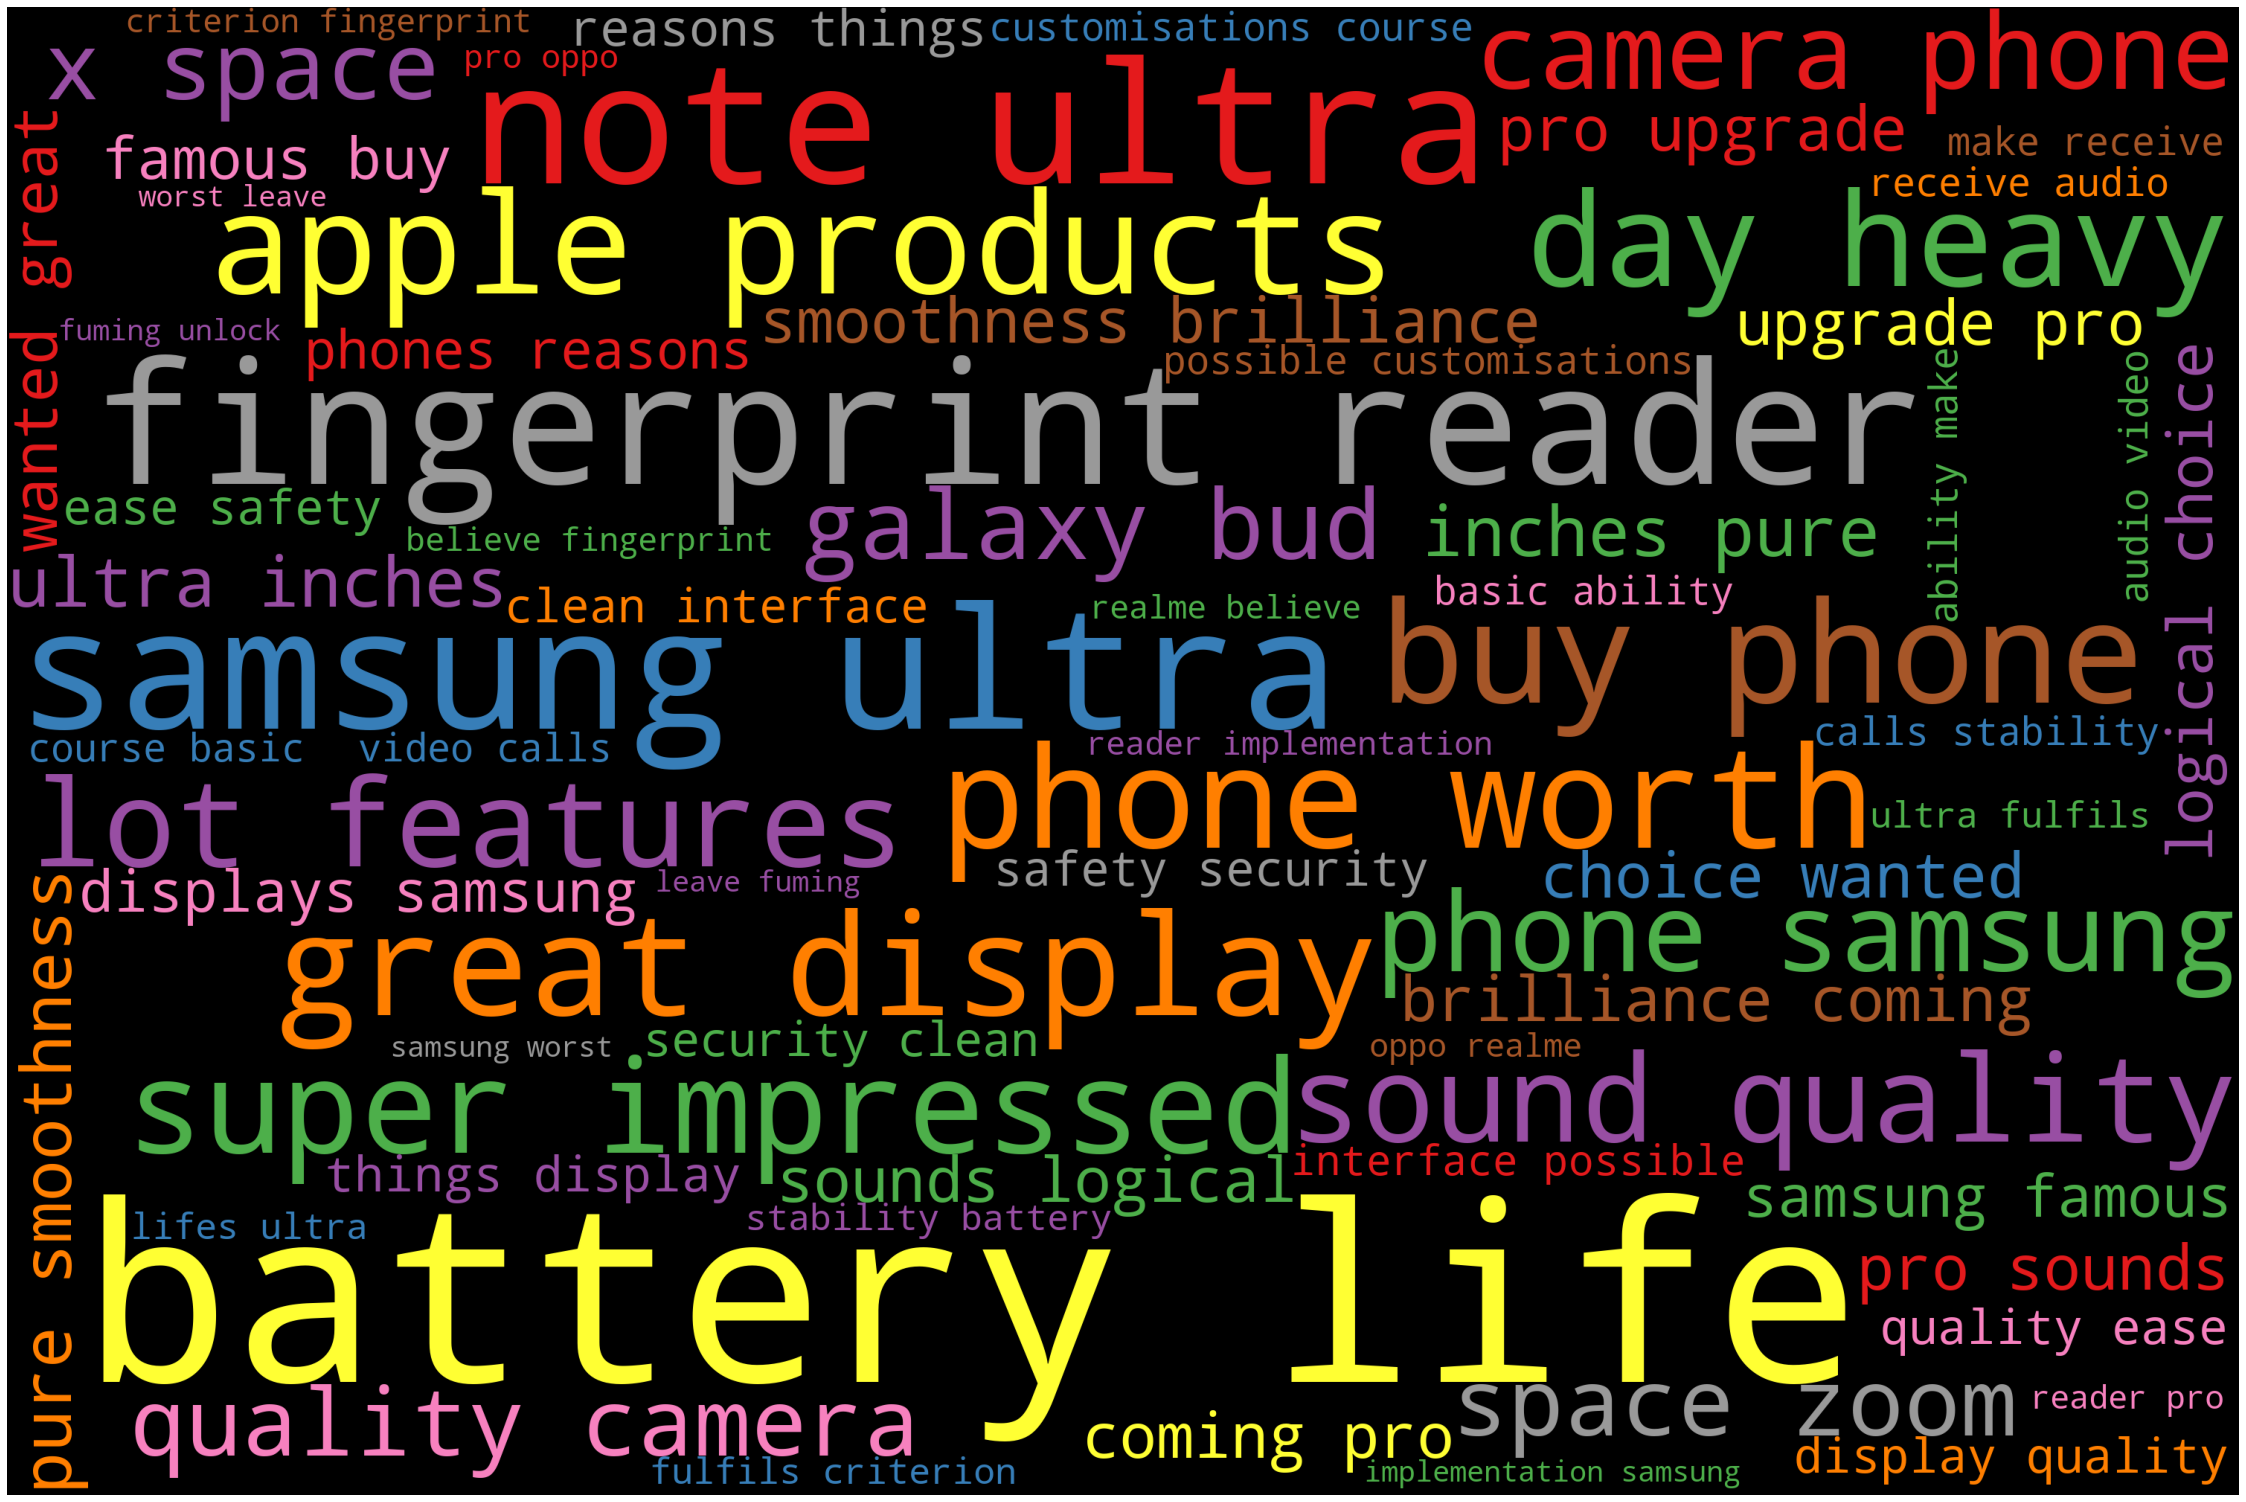

In [88]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

### Emotion Mining

In [89]:
with open("positive-words.txt", 'r') as f:
    positive=f.read().split("\n")

In [90]:
positive = positive[35:]

In [91]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

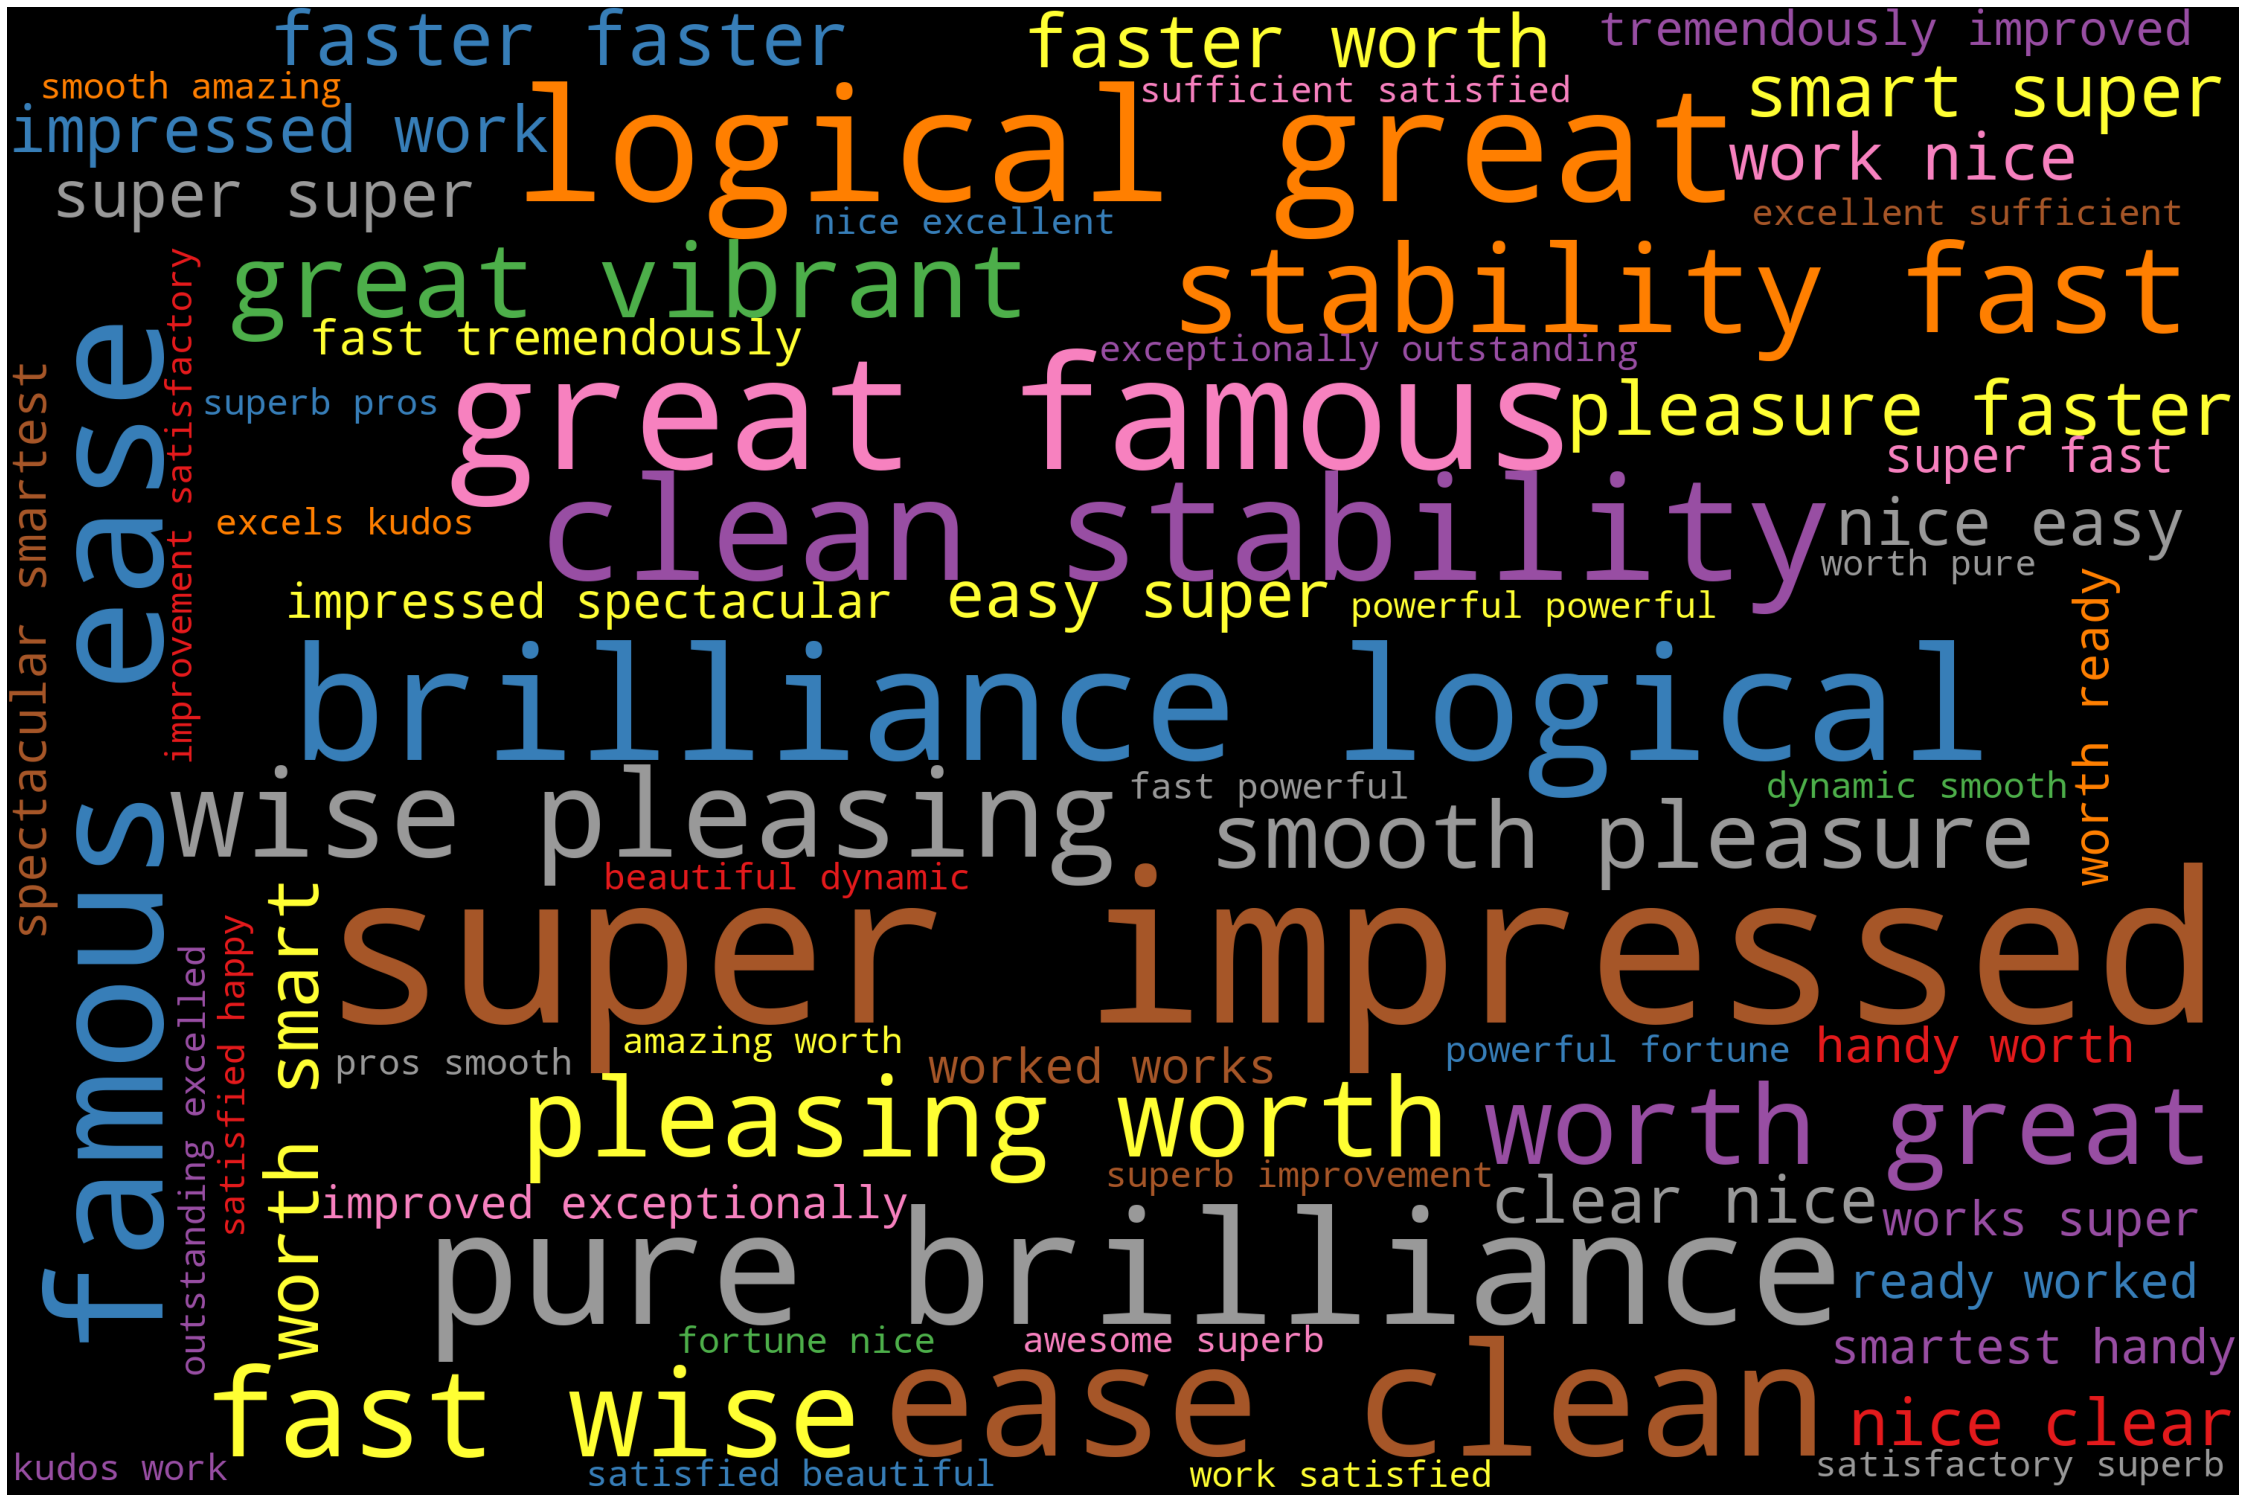

In [92]:
# Word Cloud for positive words

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)

In [98]:
with open("negative-words.txt","r", encoding = 'latin1') as f:
    negative = f.read().split("\n")

In [99]:
negative = negative[35:]

In [100]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

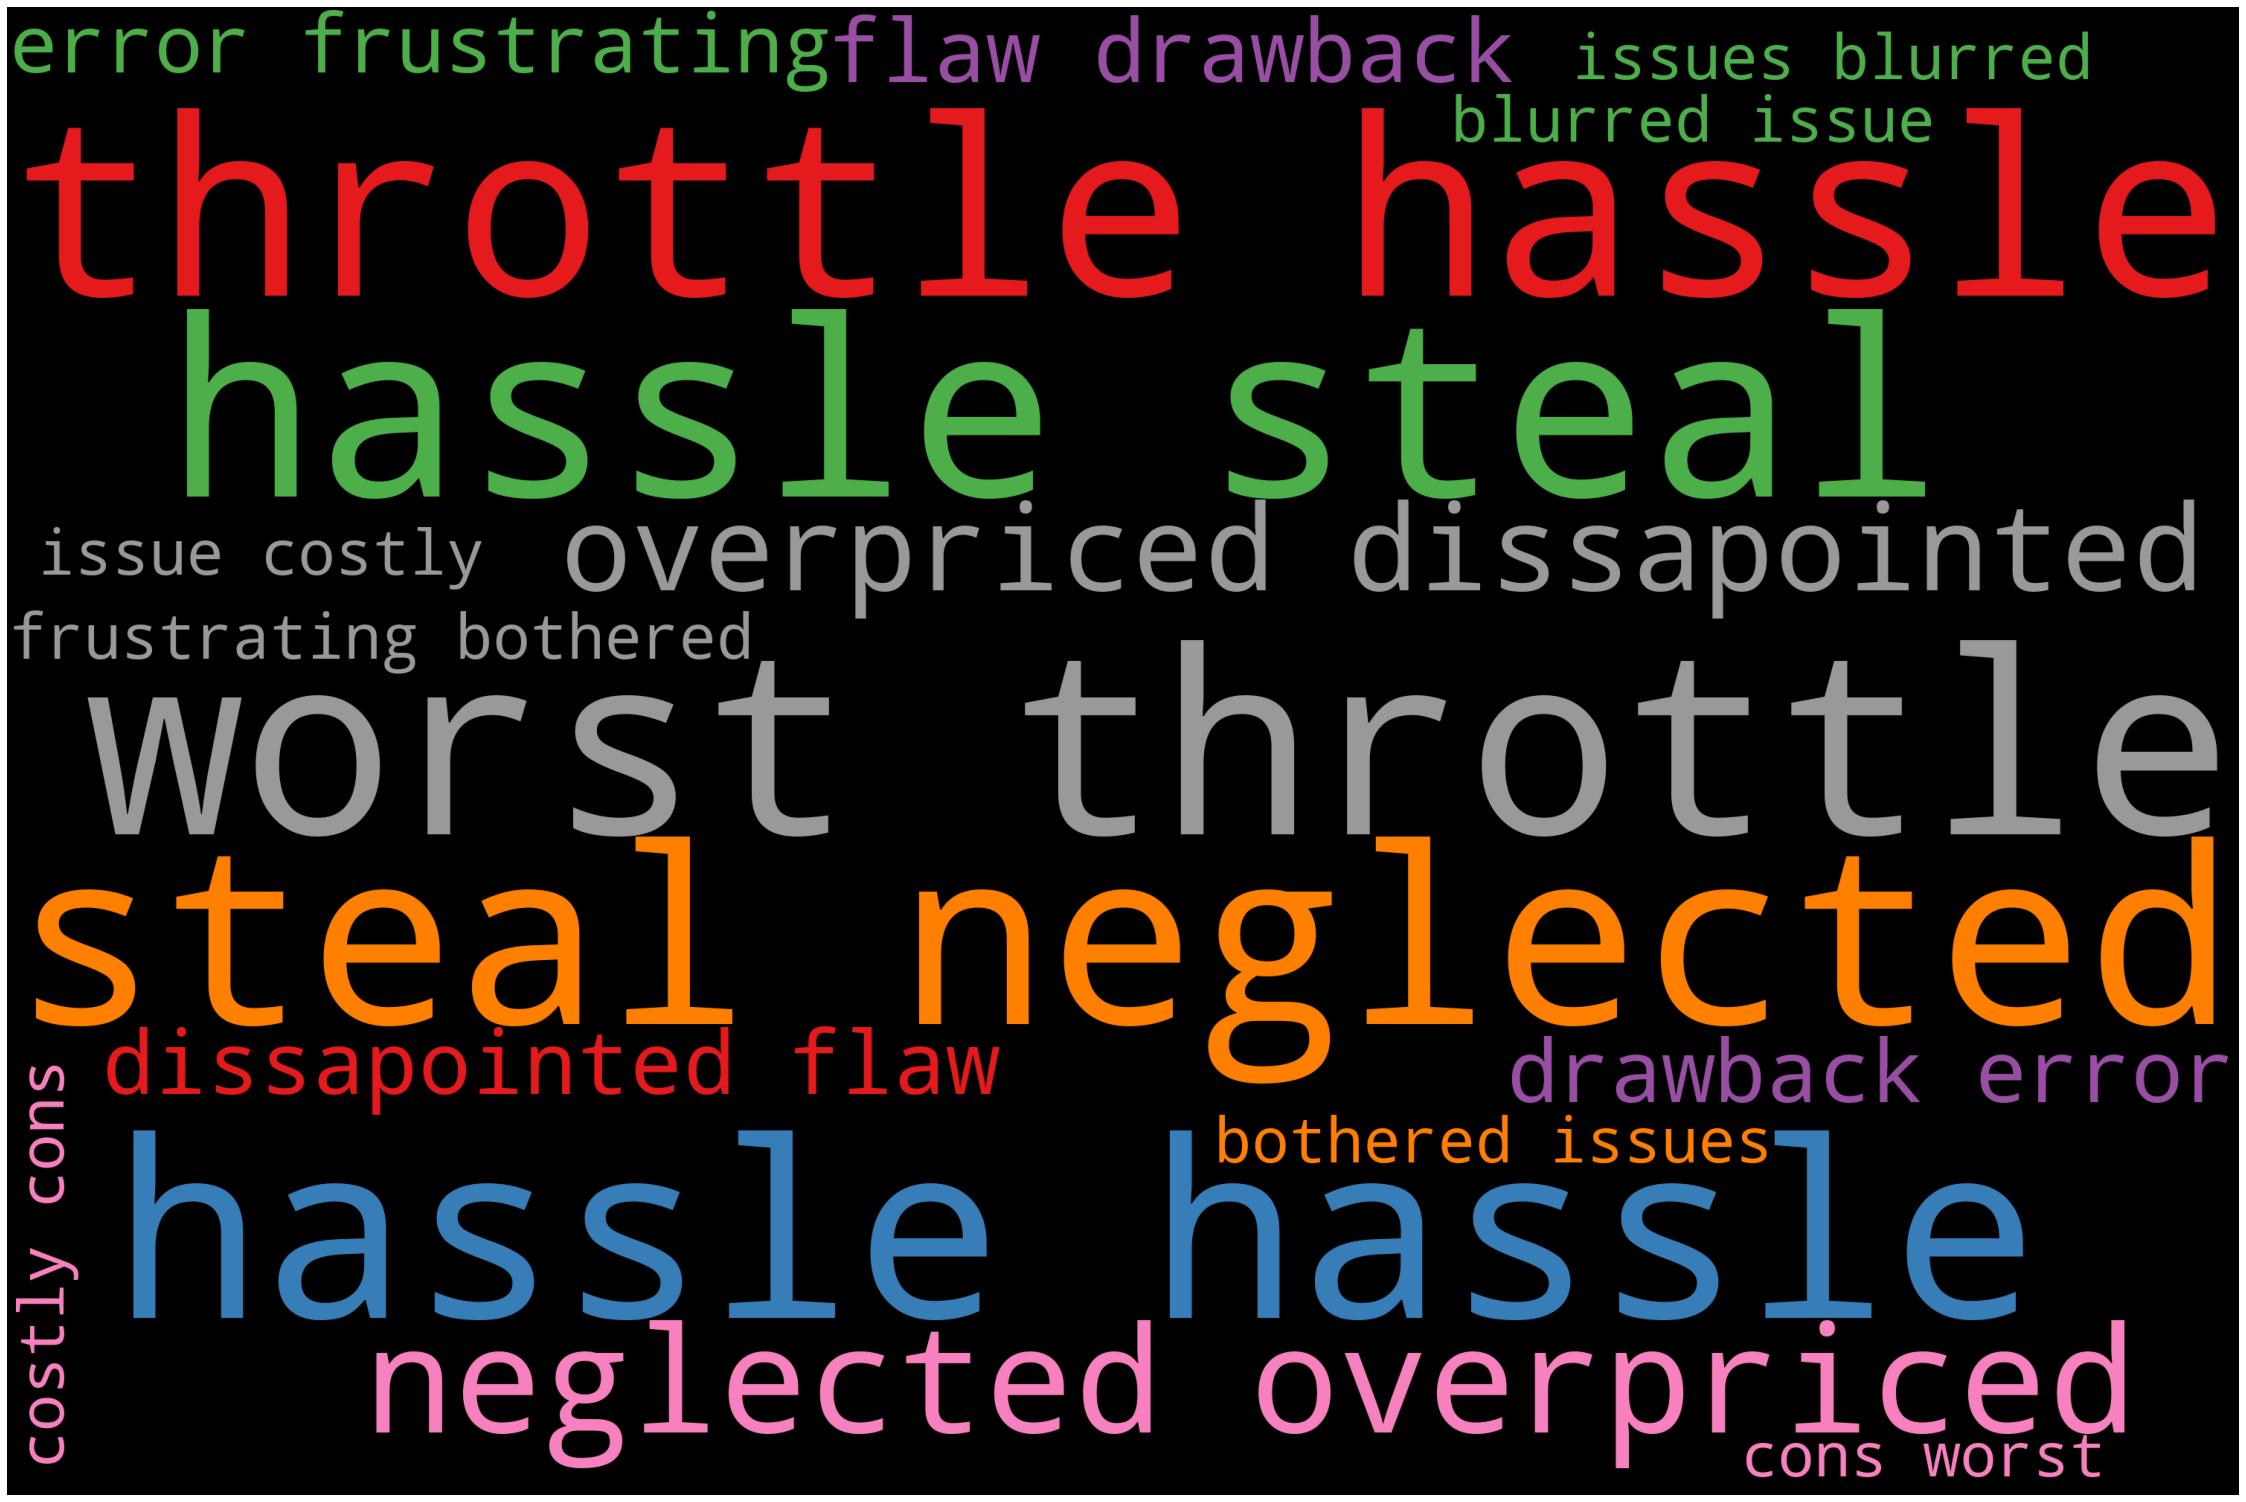

In [101]:
# Word Cloud for negative words
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)